In [17]:
import numpy as np
import pandas as pd
from datetime import datetime
from data_dictionary import desc # descriptions for each column
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df["issue_d"] = pd.to_datetime(df["issue_d"], format="%Y-%m-%d")
df["last_pymnt_d"] = pd.to_datetime(df["last_pymnt_d"], format="%Y-%m-%d")
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"], format="%b-%Y")
df.shape

(58052, 151)

There are 58052 rows (loans) and 151 columns.

In [3]:
with pd.option_context('display.max_columns', 1000):
    display(df.head())

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1288430,NaN,8000.0,8000.0,8000.0,36.0,16.29,282.41,C,C5,Detroit Medical Center,10+ years,MORTGAGE,65000.0,Not Verified,2012-05-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 05/10/12 > Our home needs ...,home_improvement,Home improvement,481xx,MI,22.65,3.0,1984-06-01,670.0,674.0,1.0,10.0,NaN,11.0,0.0,2027.0,50.7,40.0,f,0.0,0.0,1694.460000,1694.46,1077.26,614.62,0.0,2.58,0.0,2012-11-01,282.41,NaN,Mar-2019,664.0,660.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1600.0,30.4,0.0,0.0,NaN,NaN,NaN,NaN,3.0,11.0,NaN,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,0.0,NaN,19566.0,2300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1097229,NaN,30750.0,30750.0,30750.0,36.0,14.27,1055.00,C,C2,Grand Rapids Auto Body,3 years,RENT,65000.0,Verified,2012-01-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 01/06/12 > pay credit card...,debt_consolidation,Debt Consolidation,494xx,MI,20.25,0.0,2000-10-01,715.0,719.0,0.0,54.0,NaN,10.0,0.0,14700.0,77.4,21.0,f,0.0,0.0,37898.039974,37898.04,30750.00,7148.04,0.0,0.00,0.0,2014-10-01,33.43,NaN,Feb-2017,679.0,675.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN

In [4]:
df.dtypes.value_counts()

float64           124
object             23
datetime64[ns]      3
int64               1
dtype: int64

We can immediately see there are a variety of data types (numeric and non-numeric). Also, several columns contain missing values.

## Initial preprocessing

### Dropping "term"
We can drop term because we are only using three-year loans.

In [5]:
df = df.drop("term", axis = 1)
df.shape

(58052, 150)

### Missing values
Let's take a look at missing values first.

In [6]:
missing = df.isna().mean()
missing.sort_values(ascending = False).head(15)

inq_fi                              1.0
sec_app_fico_range_low              1.0
sec_app_chargeoff_within_12_mths    1.0
sec_app_num_rev_accts               1.0
sec_app_open_act_il                 1.0
sec_app_revol_util                  1.0
sec_app_open_acc                    1.0
sec_app_mort_acc                    1.0
sec_app_inq_last_6mths              1.0
sec_app_earliest_cr_line            1.0
sec_app_fico_range_high             1.0
revol_bal_joint                     1.0
inq_last_12m                        1.0
open_il_12m                         1.0
open_il_24m                         1.0
dtype: float64

Many columns have all missing values. Perhaps these fields were only recorded for later loans, which are not present in our training data. These columns cannot possibly be informative, so we should drop them. 

In [7]:
all_missing = missing[missing==1].index.values
print("Number of columns with 100% missing values:", len(all_missing))
all_missing

Number of columns with 100% missing values: 46


array(['member_id', 'next_pymnt_d', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status',
       'orig_projecte

In [8]:
df = df.drop(all_missing, axis = 1)
df.shape

(58052, 104)

### Columns unavailable at origination
There are several which are not available at the time of origination (`hardship_*`, `settlement_*`, `last_pymnt_*`, etc.) so we cannot use them for our model. We will drop these now. I used https://www.kaggle.com/karthur10/efficient-grading-for-lending-club-with-catboost as a reference to identify these columns. 

I was unsure about some of the columns, for example `num_tl_120dpd_2m` is "Number of accounts currently 120 days past due (updated in past 2 months)"; does that mean updated 2 months before origination or since that last time the data was updated? To solve this, I went out and found a newer dataset and identified which columns got updated (and thus were temporal) -- I [posted my exploration on Kaggle](https://www.kaggle.com/tysonpo/columns-available-at-origination-answer).

Note: some columns unavailable at origination were already dropped in the previous step. The ones listed below are only the remaining ones.

In [9]:
na_at_origin = ['funded_amnt_inv', 'pymnt_plan', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
                'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
                'hardship_flag', 'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 
                'settlement_amount', 'settlement_percentage', 'settlement_term']

# while we shouldn't use these in our model, we may want to come back to these to evaluate the monetary impact of our model
na_at_origin += ['out_prncp', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                'funded_amnt'] 

print(len(na_at_origin))

25


In [10]:
for col in na_at_origin:
    print(col + ": " + desc[col]) # print its description

funded_amnt_inv: The total amount committed by investors for that loan at that point in time.
pymnt_plan: Indicates if a payment plan has been put in place for the loan
out_prncp_inv: Remaining outstanding principal for portion of total amount funded by investors
total_pymnt: Payments received to date for total amount funded
total_pymnt_inv: Payments received to date for portion of total amount funded by investors
last_pymnt_d: Last month payment was received
last_pymnt_amnt: Last total payment amount received
last_credit_pull_d: The most recent month LC pulled credit for this loan
last_fico_range_high: The upper boundary range the borrower’s last FICO pulled belongs to.
last_fico_range_low: The lower boundary range the borrower’s last FICO pulled belongs to.
hardship_flag: Flags whether or not the borrower is on a hardship plan
debt_settlement_flag: Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company.
debt_settlement_flag_date: The most re

Before we drop `na_at_origin`, let's estimate the profit of each loan and save it to `train_cost.csv`. We'll use this when evaluating our model.

In [11]:
df['profit'] = df["total_pymnt"] - df["loan_amnt"]
df.groupby('loan_status')['profit'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,7319.0,-4298.751502,4754.474212,-35000.000000,-6415.830000,-3187.880000,-1024.240000,10092.020000
Fully Paid,50733.0,1768.803216,1749.931797,-19924.325684,710.399796,1352.134442,2383.301655,14243.880151


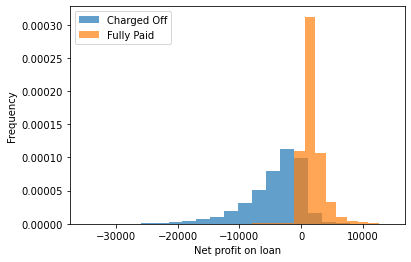

In [19]:
df.loc[df["loan_status"]=="Charged Off", "profit"].plot(kind="hist", bins=20, alpha=0.7, density=True, label="Charged Off")
df.loc[df["loan_status"]=="Fully Paid", "profit"].plot(kind="hist", bins=20, alpha=0.7, density=True, label="Fully Paid")
plt.xlabel("Net profit on loan")
plt.legend()
plt.savefig("images/profit.png")

Some columns are LendingClub projections. We'll drop these because we want our model to operate separately from LC.

In [21]:
# it's unclear whether verification status is an LC projection or not, but we'll drop it anyway
# note again that some of such columns have already been dropped in the previous step, for example
# `orig_projected_additional_accrued_interest`
grade_related = ['grade', 'sub_grade', 'int_rate', 'installment', 'verification_status']

In [22]:
df = df.drop(na_at_origin + grade_related, axis=1)
df.shape

(58052, 75)

## Unique values
We should now check for columns that have all unique values (typically "id" columns) and columns that have only 1 unique value.
Below we calculate the number of unique values for each column.

In [23]:
df_nunq = df.nunique(dropna=False).sort_values(ascending=False)
df_nunq[:10]/df.shape[0] # dividing by number of rows --> 1.0 means all rows are unique

id                   1.000000
url                  1.000000
profit               0.988407
emp_title            0.721215
desc                 0.639065
revol_bal            0.459485
total_bal_ex_mort    0.427444
title                0.399659
tot_cur_bal          0.275856
tot_hi_cred_lim      0.252946
dtype: float64

Columns `id` and `url` have all unique values and are unlikely to be meaningful. We should drop these.

In [24]:
df = df.drop(["id","url"], axis = 1)
df.shape

(58052, 73)

Now let's look at columns with few unique values.

In [25]:
df_nunq[-10:]

chargeoff_within_12_mths      5
num_tl_120dpd_2m              3
collections_12_mths_ex_med    3
num_tl_30dpd                  3
acc_now_delinq                2
loan_status                   2
initial_list_status           2
application_type              1
disbursement_method           1
policy_code                   1
dtype: int64

Several columns have only one unique value. We will remove these.

In [26]:
non_unq = df_nunq[df_nunq==1].index.values
print(non_unq)
df = df.drop(non_unq, axis=1)
df.shape

['application_type' 'disbursement_method' 'policy_code']


(58052, 70)

Some columns have more than one unique value, but only exhibit the other values a few times. For example, `tax_liens` is almost always zero.

In [27]:
df["tax_liens"].value_counts(dropna=False)

0.0    58010
NaN       23
1.0       15
2.0        2
3.0        1
5.0        1
Name: tax_liens, dtype: int64

We define a column to be "imbalanced" if the sum of the value counts of "non-primary values" are less than some cutoff (say 100). In the previous example, the "primary value" was 0 and the "non-primary values" were NA, 1, 2, and 3. The sum of the non-primary value counts were less than 100 so this class is imbalanced.

In [28]:
def is_imbalanced(column):
    # since we removed all columns with only 1 unique value, value_counts will return a series of length at least 2
    counts = column.value_counts(ascending=False, dropna=False)
    if np.sum(counts.values[1:]) < 100: # cutoff of 100 observervations was chosen somewhat arbitrarily
        return True
    else:
        return False
    
# imbal is an a series with indices being columns of df and values being True if imbalanced or False if not
imbal = df.apply(lambda x: is_imbalanced(x)) 
imbal = imbal[imbal].index.values # subset to just the indices (columns) which are True
print(imbal)
df[imbal].head()

['collections_12_mths_ex_med' 'acc_now_delinq' 'chargeoff_within_12_mths'
 'delinq_amnt' 'tax_liens']


,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [29]:
df = df.drop(imbal, axis=1)
df.shape

(58052, 65)

Now let's look at categorical columns with many unique values.

In [30]:
df.loc[:,df.dtypes=="object"].nunique(dropna=False).sort_values(ascending=False)

emp_title              41868
desc                   37099
title                  23201
zip_code                 826
addr_state                50
purpose                   14
emp_length                12
home_ownership             5
initial_list_status        2
loan_status                2
dtype: int64

In [31]:
df[["emp_title","desc","title","zip_code","emp_length"]].head()

,emp_title,desc,title,zip_code,emp_length
0,Detroit Medical Center,Borrower added on 05/10/12 > Our home needs ...,Home improvement,481xx,10+ years
1,Grand Rapids Auto Body,Borrower added on 01/06/12 > pay credit card...,Debt Consolidation,494xx,3 years
2,Beal Bank USA,Borrower added on 12/17/12 > The interest ra...,Line of Credit,959xx,< 1 year
3,The Vancouver Clinic,Borrower added on 08/23/12 > Consolidating d...,SavinMoney,986xx,2 years
4,"SS&C Technologies, Inc.",NaN,Debt Consolidation,060xx,5 years


We see `emp_title`, `desc`, and `title` are all text features. We could try to use NLP techniques (tokenization, ngrams, etc.) to extract information from these -- and then optionally perform clustering -- but we suspect results would not be very good considering the "texts" are only a few words long. We will instead drop these columns. 

In [32]:
df = df.drop(["emp_title", "desc", "title"], axis=1)

Finally, we also saw above that `zip_code` (which appears to only be the first 3 digits) has many unique values. We may cluster the zip codes by geography if needed. Column `emp_length` may be treated as categorical or ordinal.

In [33]:
print("Final number of columns in dataframe", df.shape[1])
df.head()

Final number of columns in dataframe 62


,loan_amnt,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,zip_code,addr_state,dti,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,profit
0,8000.0,10+ years,MORTGAGE,65000.0,2012-05-01,Charged Off,home_improvement,481xx,MI,22.65,...,NaN,NaN,NaN,50.0,0.0,NaN,19566.0,2300.0,NaN,-6305.540000
1,30750.0,3 years,RENT,65000.0,2012-01-01,Fully Paid,debt_consolidation,494xx,MI,20.25,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,7148.039974
2,5300.0,< 1 year,RENT,34750.0,2012-12-01,Fully Paid,credit_card,959xx,CA,12.47,...,0.0,0.0,100.0,100.0,0.0,15900.0,12283.0,12100.0,0.0,1575.849997
3,9000.0,2 years,RENT,60000.0,2012-09-01,Fully Paid,credit_card,986xx,WA,22.44,...,0.0,5.0,97.0,50.0,0.0,94311.0,71192.0,8000.0,72511.0,307.923808
4,10000.0,5 years,RENT,80000.0,2011-07-01,Fully Paid,debt_consolidation,060xx,CT,20.27,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1329.691143


### Missing values revisited

Earlier we considered, and removed, columns with **all** missing values. Now we should consider columns with "many" missing values.

In [34]:
missing = df.isna().mean().sort_values(ascending=False)
missing[missing > 0]

mths_since_last_record            0.953352
mths_since_last_major_derog       0.938882
mths_since_recent_bc_dlq          0.923965
mths_since_recent_revol_delinq    0.842762
mo_sin_old_il_acct                0.725711
mo_sin_old_rev_tl_op              0.710759
mo_sin_rcnt_rev_tl_op             0.710759
num_bc_tl                         0.710742
total_rev_hi_lim                  0.710742
total_il_high_credit_limit        0.710742
mo_sin_rcnt_tl                    0.710742
tot_cur_bal                       0.710742
tot_coll_amt                      0.710742
num_accts_ever_120_pd             0.710742
num_actv_bc_tl                    0.710742
num_actv_rev_tl                   0.710742
avg_cur_bal                       0.710742
num_il_tl                         0.710742
num_tl_120dpd_2m                  0.710742
tot_hi_cred_lim                   0.710742
pct_tl_nvr_dlq                    0.710742
num_tl_op_past_12m                0.710742
num_tl_90g_dpd_24m                0.710742
num_tl_30dp

All of the columns above `emp_length` have high missing rates (48%+). There are several missing values, prefixed by `mths_since` or `mo_since` which are *informative* (they indicate that the event never happened). However, the high missing rates for these columns<sup>1</sup> does not seem to be due to the events never occurring, but rather that LC did not record them until August 2012. Below we show the first date that `mths_since_last_major_derog` was non-null.

&#8291;1. An exception is `mths_since_last_record`, which was recorded as early as 2007.

In [35]:
def print_first_nonnull(df, col):
    print("Training data origination window:", df["issue_d"].min(), "to", df["issue_d"].max())
    print("First date", "*%s*" % col, "is non-NA:", df.loc[~df[col].isna(), "issue_d"].min())
    
print_first_nonnull(df,"mths_since_last_major_derog")

Training data origination window: 2007-06-01 00:00:00 to 2012-12-01 00:00:00
First date *mths_since_last_major_derog* is non-NA: 2012-08-01 00:00:00


We can confirm that the other "major" missing value columns are also due to a late-start on reporting.

In [36]:
print_first_nonnull(df,"num_rev_tl_bal_gt_0")

Training data origination window: 2007-06-01 00:00:00 to 2012-12-01 00:00:00
First date *num_rev_tl_bal_gt_0* is non-NA: 2012-08-01 00:00:00


We have a few options. We could (i) impute missing values, (ii) drop these columns, (iii) subset the training data to after 2012, i.e. drop rows. We suspect (i) would not be very effective considering these columns have > 50% missing rates. Option (ii) is valid, but we will lose several predictors. Below we show how many columns would be left after removing these. 

In [37]:
print("Number of columns with major missing rates:", len(missing[missing > 0.4]))
print("Number of remaning columns if removed:", len(df.columns) - len(missing[missing > 0.4]))

Number of columns with major missing rates: 39
Number of remaning columns if removed: 23


We would lose 39 predictors which is quite severe. If we do option (iii) and subset the data (rows), the concern is that we will not be left with much training data. Below we show how much data would remain upon filtering the training data to issue dates after 2012-08-01.

In [38]:
def print_missing_rates(df,filter_date):
    print("Number of rows in training data", df.shape[0])
    print("Number of rows in data subset", df.loc[df["issue_d"] >= filter_date].shape[0])
    print("\n")
    print("-------Missing rates in data subset-------")
    print(df.loc[df["issue_d"] >= filter_date].isna().mean().sort_values(ascending=False)[:15])

print_missing_rates(df,datetime(2012,8,1))

Number of rows in training data 58052
Number of rows in data subset 19806


-------Missing rates in data subset-------
mths_since_last_record            0.973846
mths_since_last_major_derog       0.820862
mths_since_recent_bc_dlq          0.777138
mths_since_recent_revol_delinq    0.665909
mths_since_last_delinq            0.527163
mo_sin_old_il_acct                0.196052
mo_sin_old_rev_tl_op              0.152227
mo_sin_rcnt_rev_tl_op             0.152227
num_il_tl                         0.152176
total_il_high_credit_limit        0.152176
num_accts_ever_120_pd             0.152176
num_actv_bc_tl                    0.152176
num_actv_rev_tl                   0.152176
avg_cur_bal                       0.152176
num_bc_tl                         0.152176
dtype: float64


We've gone from 58k to 19k rows which is certainly a loss, but a good amount still remains. On the bright side, the missing rates are significantly lower. If we are willing to go one more month, to 2012-09-01, the missing rates are essentially zero for the *non-informative* (not prefixed by `mths_since` or `mo_sin`) columns.

In [39]:
print_missing_rates(df,datetime(2012,9,1))

Number of rows in training data 58052
Number of rows in data subset 16260


-------Missing rates in data subset-------
mths_since_last_record            0.974600
mths_since_last_major_derog       0.788007
mths_since_recent_bc_dlq          0.736470
mths_since_recent_revol_delinq    0.652829
mths_since_last_delinq            0.509041
mths_since_recent_inq             0.129951
mo_sin_old_il_acct                0.054428
emp_length                        0.043419
bc_util                           0.010394
bc_open_to_buy                    0.009779
percent_bc_gt_75                  0.009779
mths_since_recent_bc              0.008241
mo_sin_old_rev_tl_op              0.003075
mo_sin_rcnt_rev_tl_op             0.003075
num_tl_op_past_12m                0.003014
dtype: float64


We will use this option to begin with. Future work may try to implement option (i) or (ii).

In [40]:
df = df.loc[df["issue_d"] >= datetime(2012,9,1)]
df.to_csv("train1.csv", index = False)

We need to perform the same operations on the validation set and testing set. That is, remove the same columns and filter the validation data issue dates to begin after 2012-09-01.

In [41]:
keep_cols = df.columns
for df_type in ["val", "test"]:
    tmp = pd.read_csv(df_type + ".csv")
    tmp["issue_d"] = pd.to_datetime(tmp["issue_d"], format="%Y-%m-%d")
    tmp["earliest_cr_line"] = pd.to_datetime(tmp["earliest_cr_line"], format="%b-%Y")
    tmp['profit'] = tmp["total_pymnt"] - tmp["loan_amnt"]
    tmp = tmp[keep_cols]
    
    if df_type == "val":
        tmp = tmp.loc[tmp["issue_d"] >= datetime(2012,9,1)]
        
    print(df_type, tmp.shape)
    tmp.to_csv(df_type + "1.csv", index = False)

val (4001, 62)


C:\Users\tysonp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


test (89784, 62)
